# Шаблоны для решения задач ЕГЭ по информатике при помощи программирования
Нижепредставленные шаблоны пригодятся вам для подготовки к сдаче **ЕГЭ по информатике**. Они **актуальны на _2024_ год** и будут обновляться по мере изменения содержания экзамена.\
Шаблоны представлены в виде примеров решения типовых задач с комментариями.

**Автор: [lunarmolly (Ковтун Кирилл)](https://github.com/lunarmolly)\
Репозиторий: [lunarmolly/ru-use-inf-templates](https://github.com/lunarmolly/ru-use-inf-templates)**

_USE - Unified State Exam (ЕГЭ)_

## Задание 2. Таблицы истинности и логические схемы
### Теория
Единственные знания, необходимые для успешного решения этого задания - условные обозначения логических операций. Представляю вашему вниманию интерпритацию условных обозначений на язык Python:\
**_Название - Условное обозначение - Оператор Python_** \
Конъюнкция - **∧** - **and**\
Дизъюнкция - **∨** - **or**\
Отрицание - **¬** - **not**\
Импликация - **→** - **<=**\
Тождество - **≡** - **==**


### Пример решения задания
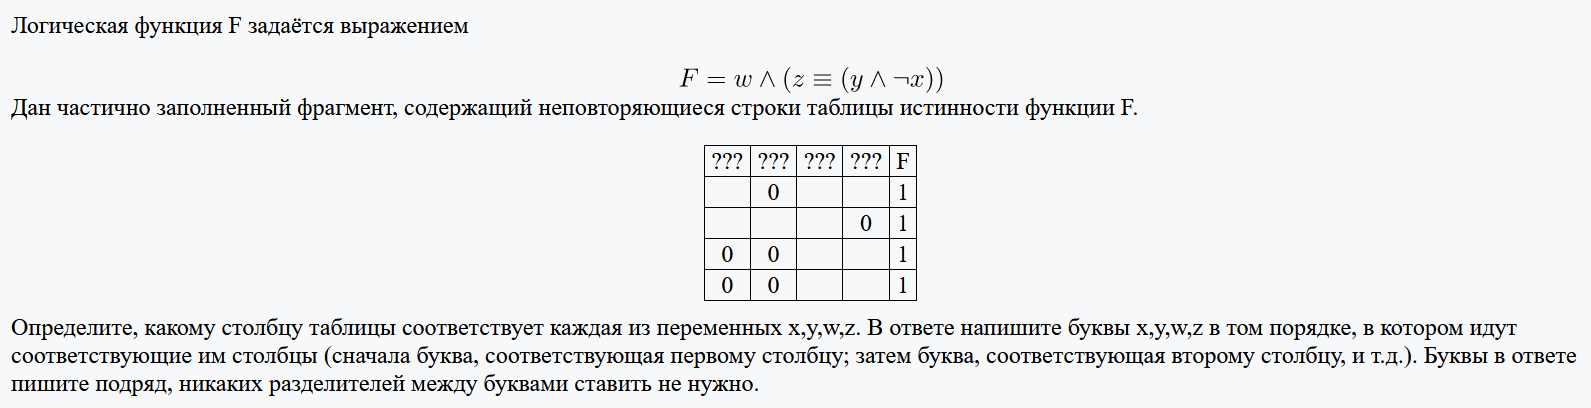

Нам дана функция и таблица истинности для нее. Нам необходимо перебрать все значения переменных и сопоставить столбцы полученной таблицы со столбцами данной таблицы.\
Решение:

In [ ]:
print('x y w z') # Выводим список переменных, чтобы затем построить таблицу
a = [0, 1] # Вместо того, чтобы в каждом цикле использовать range(2), заранее создаем список значений - так быстрее, но использование range() тоже допустимо
# Теперь перебираем все возможные значения данной функции
for x in a: 
    for y in a:
        for w in a:
            for z in a:
                # Переписываем функцию на язык Python и проверяем её истинность или ложность
                # В данном примере F всегда равен 1, поэтому проверяем истинность функции
                if w and (z == (y and not x)): # если условие выполняется, то выводим его в консоль
                    print(x, y, w, z)

Итак, мы получили таблицу:
```
x y w z
0 0 1 0
0 1 1 1
1 0 1 0
1 1 1 0
```
Но мы замечаем, что полученные значения по вертикали находятся не в том порядке, что в данной нам таблице. Остается мысленно передвигать строги таблицы, чтобы получилось решить задание.\
Если с этим возникают трудности, можно продублировать полученную таблицу в Excel и поперемещать строки там.
```
x y w z
1 1 1 0
0 1 1 1
0 0 1 0
1 0 1 0
```
После недолгого перемещения строк мы получаем таблицу, где полученные значения совпадают с данными значениями данной таблицы.\
Ответ: yzwx.

## Задание 5. Простые алгоритмы для формального исполнителя с ограниченным набором команд
По моему мнению, для решения большинства задач типа 5 нет нужды иметь какую-либо теоретическую базу, но могут попадаться и сложные варианты, где придется изобретать велосипед. Но наша задача - рассмотреть решение типовой задачи, поэтому сразу приступим к решению.
### Пример решения задания
Алгоритм получает на вход натуральное число N > 1 и строит по нему новое число
R следующим образом:

1. Строится двоичная запись числа N.
2. Подсчитывается количество нулей и единиц в полученной записи. Если их ко-
личество одинаково, в конец записи добавляется её последняя цифра. В противном
случае в конец записи добавляется цифра, которая встречается реже.
3. Шаг 2 повторяется ещё два раза.
4. Результат переводится в десятичную систему счисления.

При каком наибольшем исходном числе N < 750 в результате работы алгоритма
получится чётное число, которое не делится на 4?

In [ ]:
for n in range(2, 750): # N > 1 и N - натуральное число, поэтому за точку отсчета возьмем 1. Конечной точкой возьмем 749, так как N < 750.
    r = bin(n)[2:] # Выполняем 1 пункт - строим двоичную запись числа N
    for i in range(3): # Считаем число нулей и единиц
        r0 = r.count('0')
        r1 = r.count('1')
        # Сравниваем их количество и выполняем заложенные действия
        if r0 == r1:
            r = r + r[-1]
        elif r0 < r1:
            r = r + '0'
        else:
            r = r + '1'
    res = int(r, 2) # Переводим в десятичную систему счисления
    if res % 2 == 0 and res % 4 != 0: # Проверяем четность и делимость на 4
        print(n) # Выводим все подходящие N. Так как нас просят найти наибольшее число в заданном промежутке, берем самое последнее
    # Ответ - 480.

## Задание 8. Комбинаторика
Для решения этой задачи мы можем использовать как обычный перебор циклами, так и метод _product_ модуля _itertools_. Рассмотрим оба варианта при решении следующей задачи:
### Пример решения задания
Все четырехбуквенные слова, составленные из букв А, Л, Г, О, Р, И, Т, М записаны
в алфавитном порядке и пронумерованы, начиная с 1. Начало списка выглядит так:

1. АААА
2. АААГ
3. АААИ
4. АААЛ
5. АААМ
6. АААО
7. АААР
8. АААТ
9. ААГА

Под каким номером в списке идет последнее слово, которое заканчивается на АЛ?

In [ ]:
# Наш алфавит: А, Л, Г, О, Р, И, Т, М
# Но нам нужно его отсортировать в алфавитном порядке согласно русскому алфавиту (можно сделать при помощи сортировки в Word)
# Получим А, Г, И, Л, М, О, Р, Т

# Сначала решим задачу при помощи обычного перебора циклами:
a = 'АГИЛМОРТ' # Наш алфавит
c = 0 # В счетчик будем записывать номер слова
for i in a: # Делаем столько переборов, сколько букв должно быть в каждом слове. В нашем случае - 4
    for j in a:
        for k in a:
            for l in a:
                s = i + j + k + l # Составляем слово. В этом действии нет необходимости, но оставляем его, чтобы проверить себя
                c += 1 # Увеличиваем счетчик
                if k == 'А' and l == 'Л': # Провеляем условие
                    print(c, s) # Выводим искомый номер слова и само слово, чтобы свериться
# Так как мы ищем последнее слово, листаем в конец вывода и находим ответ
# Ответ: 4036

In [ ]:
# Теперь при помощи itertools:
a = 'АГИЛМОРТ' # Наш алфавит
c = 0 # В счетчик будем записывать номер слова
from itertools import product
c = 0
for i in product(a, repeat=4): # repeat - длина слова
    c += 1 # Увеличиваем счетчик
    if i[-2] == 'А' and i[-1] == "Л": # Проверяем условие
        print(c, i) # Выводим искомый номер слова и само слово, чтобы свериться
# Так как мы ищем последнее слово, листаем в конец вывода и находим ответ
# Ответ: 4036

Также существуют варианты, где алфавит состоит из чисел. Принципиально это ничего не меняет: можем использовать цифры как строковые данные или делать перебор самих чисел (зависит от условия задачи). Я не отношу такие задачи к типовым, поэтому отдельно их рассматривать не буду (решения интересуюших вас задач вы все еще можете найти в интернете в открытом доступе).

# Задание 9. Обработка числовой информации, данной в электронной таблице
## Теория
Данное задание часто решают с помощью самого Excel. Но я считаю, что нужно использовать программирование во всех заданиях, где это возможно, ведь так быстрее и удобнее.

В этом задании нам часто пригодятся **флаги**. Обычно они используются для задач, где нужно сильно оптимизировать код, но я считаю, что здесь они пригодятся для более удобной проверки выполнения условий. Чтобы не писать большую конструкцию ветвления и не запутаться в ней, просто заранее объявляем флаг **f** и отдельно проверяем каждое условие. Меняем значение флага, если условие не выполняется, а в конце цикла просто проверяем значение флага. Я надеюсь, станет понятнее в самом примере решения.

Для начала решения открываем данную таблицу _**tasks\9-227__3ha56.xls**_ и сохраняем ее в формате **Текстовые файлы (с разделителями табуляции) (.txt)*, чтобы можно было работать с таблицей в Python\
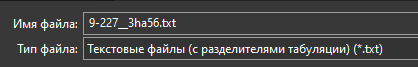

## Пример решения задания
(A. Богданов) В файле электронной таблицы 9-227.xls в каждой строке записаны четыре натуральных числа. Определите количество строк таблицы, для которых выполнены следующие условия:
- только одно число встречается в строке дважды;
- сумма двух самых больших чисел строки более чем в два раза больше суммы
двух самых малых;
- максимальное число строки не кратно минимальному.

В ответе запишите только число.

In [ ]:
rows = [] # Заранее создаем список всех строк таблицы

# Открываем файл таблицы, который мы заранее перевели в .txt
with open("tasks\9-227__3ha56.txt") as f:
    for s in f: # Делаем перебор по строкам
        # Разбиваем строку на числа и записываем в список a
        # Для удобства сортируем в порядке возрастания
        a = sorted(int(i) for i in s.split())
        # Записываем список чисел строки в список всех строк
        rows.append(a)

c = 0 # Создаем счетчик
for row in rows:
    f = 0 # Создаем флаг
    
    # Проверяем первое условие
    # Создаем переменные для подсчета количества повторяюшихся и неповторяющихся чисел
    twice = 0
    once = 0
    for i in row: # Проходимся по каждому числу в строке
        # Проверяем количество повторений каждого числа в строке и записываем
        if row.count(i) == 2:
            twice += 1
        elif row.count(i) == 1:
            once += 1
        # Если повторов числа больше двух, можем сразу отсеять эту строку
        else:
            f = 1 
    if twice != 2: # Проверяем само условие
        f = 1
    
    # Проверяем второе условие
    # Здесь нам пригодилась сортировка
    # Просто проверяем остаток от деления суммы самых больших на сумму самых маленьких
    if (row[2] + row[3]) / (row[0] + row[1]) <= 2.0:
        f = 1
    
    # И проверяем третье условие
    if max(row) % min(row) == 0:
        f = 1
    
    # Если красных флагов не появилось, увеличиваем счетчик
    if f == 0:
        c += 1

print(c)
# Ответ: 125